## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

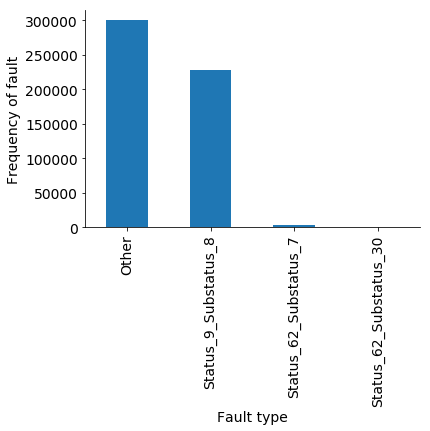

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status

In [ ]:
y.value_counts()

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64

### Split into training and test

In [ ]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

## Random forest and feature importance

Normalized confusion matrix
[[9.97747498e-01 4.04036323e-05 5.85852668e-04 1.62624620e-03]
 [2.61904762e-01 7.06349206e-01 0.00000000e+00 3.17460317e-02]
 [2.73668639e-02 0.00000000e+00 9.72633136e-01 0.00000000e+00]
 [3.31296961e-04 0.00000000e+00 0.00000000e+00 9.99668703e-01]]


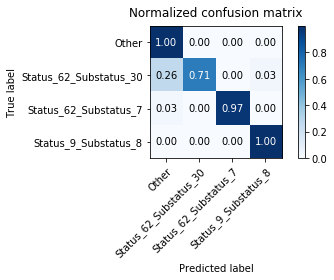

Total Accuracy 		0.998

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.999 		 0.998 		 0.998
Status_62_Substatus_30    	 0.957 		 0.706 		 0.813
Status_62_Substatus_7     	 0.958 		 0.973 		 0.965
Status_9_Substatus_8      	 0.998 		 1.000 		 0.999


In [ ]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [ ]:
rf

,importance
ActivePower,0.189577
Log-T-Raw-Rectifier1HeatSink,0.119387
Log-T-Raw-TransformerTemperature,0.085824
Average blade angle across A B C,0.057784
Log-T-Raw-Stator2Temperature,0.040386
Log-T-Raw-Stator1Temperature,0.037200
Log-T-Raw-NacelleAmbientTemperature,0.036596
Ambient-Temperature,0.032032
Log-T-Raw-ControlCabinetTemperature,0.030425
Log-T-Raw-TowerTemperature,0.027442


# Preprocessing

### Scale dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit(X)
scaled_X = scaled_X.transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=list(X))
scaled_X.head(10)

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.521739,0.292343,0.855274,0.935933,0.892695,0.621951,0.400000,0.331169,0.411111,0.460674,...,0.673684,0.560440,0.303030,0.265957,0.388889,0.623529,0.551724,0.700000,0.073171,0.970427
1,0.495091,0.129930,0.505063,0.476323,0.000000,0.426829,0.335484,0.285714,0.444444,0.449438,...,0.852632,0.890110,0.469697,0.500000,0.185185,0.352941,0.482759,0.284615,0.124072,0.639621
2,0.501543,0.083527,0.410549,0.403900,0.000000,0.621951,0.374194,0.357143,0.644444,0.640449,...,0.621053,0.648352,0.666667,0.425532,0.481481,0.494118,0.379310,0.438462,0.000000,0.594692
3,0.469004,0.308585,0.840084,0.947075,0.739579,0.573171,0.387097,0.357143,0.500000,0.528090,...,0.515789,0.681319,0.424242,0.510638,0.314815,0.470588,0.327586,0.430769,0.000000,0.942370
4,0.500421,0.058005,0.274262,0.362117,0.002064,0.475610,0.303226,0.292208,0.511111,0.505618,...,0.347368,0.373626,0.424242,0.287234,0.296296,0.388235,0.258621,0.361538,0.053022,0.565498
5,0.448808,0.139211,0.418565,0.116992,0.046636,0.536585,0.354839,0.337662,0.555556,0.573034,...,0.694737,0.736264,0.545455,0.329787,0.481481,0.505882,0.379310,0.453846,0.000000,0.363791
6,0.496494,0.171694,0.586498,0.395543,0.156418,0.500000,0.367742,0.324675,0.444444,0.449438,...,0.663158,0.648352,0.409091,0.521277,0.222222,0.423529,0.224138,0.361538,0.000000,0.585592
7,0.330715,0.013921,0.000000,0.598886,0.000000,0.341463,0.212903,0.233766,0.411111,0.415730,...,0.168421,0.197802,0.303030,0.372340,0.203704,0.341176,0.500000,0.292308,0.626511,0.611943
8,0.487798,0.296984,0.884388,0.298050,0.841931,0.573171,0.348387,0.383117,0.411111,0.449438,...,0.378947,0.318681,0.196970,0.234043,0.333333,0.541176,0.379310,0.492308,0.000000,0.513365
9,0.505189,0.301624,0.616034,0.286908,0.170863,0.585366,0.425806,0.350649,0.666667,0.685393,...,0.600000,0.593407,0.530303,0.500000,0.611111,0.635294,0.586207,0.469231,0.281124,0.517536


### SVM method

In [ ]:
svm_method.get_svm_model(X_train, X_test, y_train, y_test)

Loading...
Training...


### SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
sm = SMOTE(random_state=12)
X_